Steps followed:
1)Load Datset
2)Merge the datasets
3)check for missing values
4)check for duplicated rows
5)convert the categorical data to numerical data using one hot encoding and label encoding
6)check for outliers and handle them accordingly
7)check for multicolliearity and check the corrrelation of features with target variable and remove features accordingly.
8)Apply algorithms.

In [2]:
import pandas as pd

In [3]:
center_df=pd.read_csv('fulfilment_center_info.csv')

In [4]:
center_df.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [5]:
meal_df=pd.read_csv('meal_info.csv')

In [6]:
meal_df.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [7]:
train_df=pd.read_csv('train.csv')

In [8]:
train_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [9]:
test_df=pd.read_csv('test.csv')

In [10]:
test_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In [11]:
train_merge=pd.merge(train_df,meal_df,how="left",on="meal_id")
train_df=pd.merge(train_merge,center_df,how="left",on="center_id")
test_merge=pd.merge(test_df,meal_df,how="left",on="meal_id")
test_df=pd.merge(test_merge,center_df,how="left",on="center_id")

In [12]:
train_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [13]:
test_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured   category cuisine  city_code  \
0                      0                  0  Beverages    Thai        647   
1                      0                  0  Beverages    Thai        647   
2                      0                  0  Beverages    Thai        647   
3                      0                  0  Beverages  Indian        647   
4                      0                  0  Beverages  Indian        647   

   region_code center_type  op_area  
0           56      TYPE_C      2.0  
1           56      TYPE_C      2.0  
2           56      TYPE_C      2.0  
3           56      TYPE_C      2.0  
4           56      TYPE_C      2.0

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [15]:
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [16]:
test_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [17]:
print(train_df.duplicated().sum()) #to check for number of duplicate rows
print(test_df.duplicated().sum())

0
0


In [18]:
duplicate_rows = train_df[train_df.duplicated()] #returns rows that are duplicated if any.
print(duplicate_rows)


Empty DataFrame
Columns: [id, week, center_id, meal_id, checkout_price, base_price, emailer_for_promotion, homepage_featured, num_orders, category, cuisine, city_code, region_code, center_type, op_area]
Index: []


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
train_df.head()


id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine  \
0                      0                  0         177  Beverages    Thai   
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [21]:
train_df['category'].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

In [22]:
train_df['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [23]:
train_df['center_type'].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [24]:
#rearrange target column
target_column=train_df.pop("num_orders")
train_df["num_orders"]=target_column
train_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured   category cuisine  city_code  \
0                      0                  0  Beverages    Thai        647   
1                      0                  0  Beverages    Thai        647   
2                      0                  0  Beverages    Thai        647   
3                      0                  0  Beverages  Indian        647   
4                      0                  0  Beverages  Indian        647   

   region_code center_type  op_area  num_orders  
0           56      TYPE_C      2.0         177  
1           56      TYPE_C      2.0         270  
2           56      TYPE_C      2.0         189  
3           56      TYPE_C      2.0          54  
4           56      TYPE_C      2.0          40

In [25]:

print(train_df.dtypes)

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
num_orders                 int64
dtype: object


In [26]:
train_df['category']=train_df['category'].astype('category')
train_df['cuisine']=train_df['cuisine'].astype('category')
train_df['center_type']=train_df['center_type'].astype('category')
print(train_df.dtypes)

id                          int64
week                        int64
center_id                   int64
meal_id                     int64
checkout_price            float64
base_price                float64
emailer_for_promotion       int64
homepage_featured           int64
category                 category
cuisine                  category
city_code                   int64
region_code                 int64
center_type              category
op_area                   float64
num_orders                  int64
dtype: object


In [27]:
print(train_df.columns)


Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine',
       'city_code', 'region_code', 'center_type', 'op_area', 'num_orders'],
      dtype='object')


In [28]:
#use one-hot encoding to convert above categorical values to numerical values.
#we need to drop one column from one hot encoded columns to avoid multicollinearity. as that particular features one hot encoded columns will have a combined sum of 1.
train_df=pd.get_dummies(train_df,drop_first=True,columns=['category','cuisine','center_type'],prefix=['category','cuisine','center_type'])
train_df


id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1466964     1         55     1993          136.83      135.83   
2       1346989     1         55     2539          134.86      135.86   
3       1338232     1         55     2139          339.50      437.53   
4       1448490     1         55     2631          243.50      242.50   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543          484.09      484.09   
456544  1062036   145         61     2304          482.09      482.09   
456545  1110849   145         61     2664          237.68      321.07   
456546  1147725   145         61     2569          243.50      313.34   
456547  1361984   145         61     2490          292.03      290.03   

        emailer_for_promotion  homepage_featured  city_code  region_code  ...  \
0                           0                  0        647           56  ...   
1                           0                  0        647           56  ...   
2                           0                  0        647           56  ...   
3                           0                  0        647           56  ...   
4                           0                  0        647           56  ...   
...                       ...                ...        ...          ...  ...   
456543                      0                  0        473           77  ...   
456544                      0                  0        473           77  ...   
456545                      0                  0        473           77  ...   
456546                      0                  0        473           77  ...   
456547                      0                  0        473           77  ...   

        category_Salad  category_Sandwich  category_Seafood  category_Soup  \
0                False              False             False          False   
1                False              False             False          False   
2                False              False             False          False   
3                False              False             False          False   
4                False              False             False          False   
...                ...                ...               ...            ...   
456543           False              False             False          False   
456544           False              False             False          False   
456545            True              False             False          False   
456546            True              False             False          False   
456547            True              False             False          False   

        category_Starters  cuisine_Indian  cuisine_Italian  cuisine_Thai  \
0                   False           False            False          True   
1                   False           False            False          True   
2                   False           False            False          True   
3                   False            True            False         False   
4                   False            True            False         False   
...                   ...             ...              ...           ...   
456543              False            True            False         False   
456544              False            True            False         False   
456545              False           False             True         False   
456546              False           False             True         False   
456547              False           False             True         False   

        center_type_TYPE_B  center_type_TYPE_C  
0                    False                True  
1                    False                True  
2                    False                True  
3                    False                True  
4                    False                True  
...                

In [29]:
train_df = train_df.astype(int)

In [30]:
train_df

id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885             136         152   
1       1466964     1         55     1993             136         135   
2       1346989     1         55     2539             134         135   
3       1338232     1         55     2139             339         437   
4       1448490     1         55     2631             243         242   
...         ...   ...        ...      ...             ...         ...   
456543  1271326   145         61     1543             484         484   
456544  1062036   145         61     2304             482         482   
456545  1110849   145         61     2664             237         321   
456546  1147725   145         61     2569             243         313   
456547  1361984   145         61     2490             292         290   

        emailer_for_promotion  homepage_featured  city_code  region_code  ...  \
0                           0                  0        647           56  ...   
1                           0                  0        647           56  ...   
2                           0                  0        647           56  ...   
3                           0                  0        647           56  ...   
4                           0                  0        647           56  ...   
...                       ...                ...        ...          ...  ...   
456543                      0                  0        473           77  ...   
456544                      0                  0        473           77  ...   
456545                      0                  0        473           77  ...   
456546                      0                  0        473           77  ...   
456547                      0                  0        473           77  ...   

        category_Salad  category_Sandwich  category_Seafood  category_Soup  \
0                    0                  0                 0              0   
1                    0                  0                 0              0   
2                    0                  0                 0              0   
3                    0                  0                 0              0   
4                    0                  0                 0              0   
...                ...                ...               ...            ...   
456543               0                  0                 0              0   
456544               0                  0                 0              0   
456545               1                  0                 0              0   
456546               1                  0                 0              0   
456547               1                  0                 0              0   

        category_Starters  cuisine_Indian  cuisine_Italian  cuisine_Thai  \
0                       0               0                0             1   
1                       0               0                0             1   
2                       0               0                0             1   
3                       0               1                0             0   
4                       0               1                0             0   
...                   ...             ...              ...           ...   
456543                  0               1                0             0   
456544                  0               1                0             0   
456545                  0               0                1             0   
456546                  0               0                1             0   
456547                  0               0                1             0   

        center_type_TYPE_B  center_type_TYPE_C  
0                        0                   1  
1                        0                   1  
2                        0                   1  
3                        0                   1  
4                        0                   1  
...                

In [31]:
#check for multicollinearity  
correlation_matrix=train_df.corr()
correlation_matrix


id      week  center_id   meal_id  \
id                     1.000000  0.002225   0.002641  0.000488   
week                   0.002225  1.000000  -0.003450  0.019814   
center_id              0.002641 -0.003450   1.000000  0.009893   
meal_id                0.000488  0.019814   0.009893  1.000000   
checkout_price         0.001936  0.026691   0.001318  0.010660   
base_price             0.002906  0.028736   0.000561  0.002501   
emailer_for_promotion  0.002001 -0.000841   0.013658  0.013402   
homepage_featured      0.003111 -0.008263  -0.005043  0.016354   
city_code             -0.000387  0.000405   0.061078 -0.003198   
region_code           -0.000648  0.004600  -0.003426 -0.001662   
op_area                0.000708  0.001051  -0.104374 -0.001505   
num_orders             0.000702 -0.017210  -0.053035  0.010597   
category_Biryani       0.001450 -0.008556  -0.002603 -0.156270   
category_Desert        0.001696 -0.004499   0.004251  0.035378   
category_Extras       -0.001455 -0.004189  -0.051970 -0.185007   
category_Fish         -0.001214  0.114410  -0.003596  0.033455   
category_Other Snacks -0.000331 -0.000548   0.004673  0.154997   
category_Pasta         0.000870 -0.015443   0.004990 -0.075666   
category_Pizza        -0.000027 -0.010517   0.007297  0.005602   
category_Rice Bowl     0.000650 -0.011077   0.007113 -0.161994   
category_Salad         0.000624  0.053560   0.006638  0.260413   
category_Sandwich     -0.000060 -0.010443   0.007239  0.080984   
category_Seafood       0.001709 -0.008290   0.001415  0.084958   
category_Soup         -0.001459 -0.000993  -0.045336 -0.032146   
category_Starters     -0.002138 -0.014198   0.000266  0.159467   
cuisine_Indian         0.002281 -0.014767   0.007037 -0.156288   
cuisine_Italian        0.000245  0.008295   0.014695  0.096024   
cuisine_Thai          -0.003080 -0.015930  -0.029820  0.125012   
center_type_TYPE_B     0.000181  0.009282  -0.091954  0.004090   
center_type_TYPE_C     0.000378 -0.004497  -0.061086 -0.008088   

                       checkout_price  base_price  emailer_for_promotion  \
id                           0.001936    0.002906               0.002001   
week                         0.026691    0.028736              -0.000841   
center_id                    0.001318    0.000561               0.013658   
meal_id                      0.010660    0.002501               0.013402   
checkout_price               1.000000    0.953405               0.004805   
base_price                   0.953405    1.000000               0.171182   
emailer_for_promotion        0.004805    0.171182               1.000000   
homepage_featured           -0.057212    0.057165               0.390534   
city_code                   -0.004787   -0.002031              -0.005234   
region_code                 -0.003653   -0.001927              -0.007462   
op_area                      0.019851    0.016696              -0.018662   
num_orders                  -0.282222   -0.222407               0.277147   
category_Biryani             0.168258    0.144756              -0.064625   
category_Desert              0.180609    0.183288              -0.018766   
category_Extras             -0.182037   -0.162522              -0.051999   
category_Fish                0.243853    0.228301              -0.037239   
category_Other Snacks       -0.127089   -0.131656              -0.056591   
category_Pasta               0.105247    0.116695               0.014166   
category_Pizza               0.460624    0.504272               0.206914   
category_Rice Bowl          -0.027277   -0.026042               0.011546   
category_Salad              -0.069944   -0.086318              -0.007739   
category_Sandwich           -0.077495   -0.085321               0.049495   
category_Seafood             0.455378    0.484124               0.094457   
category_Soup               -0.120731   -0.129068              -0.050220   
category_Starters           -0.093326   -0.115254              -0.034307   
cuisin

<Axes: >

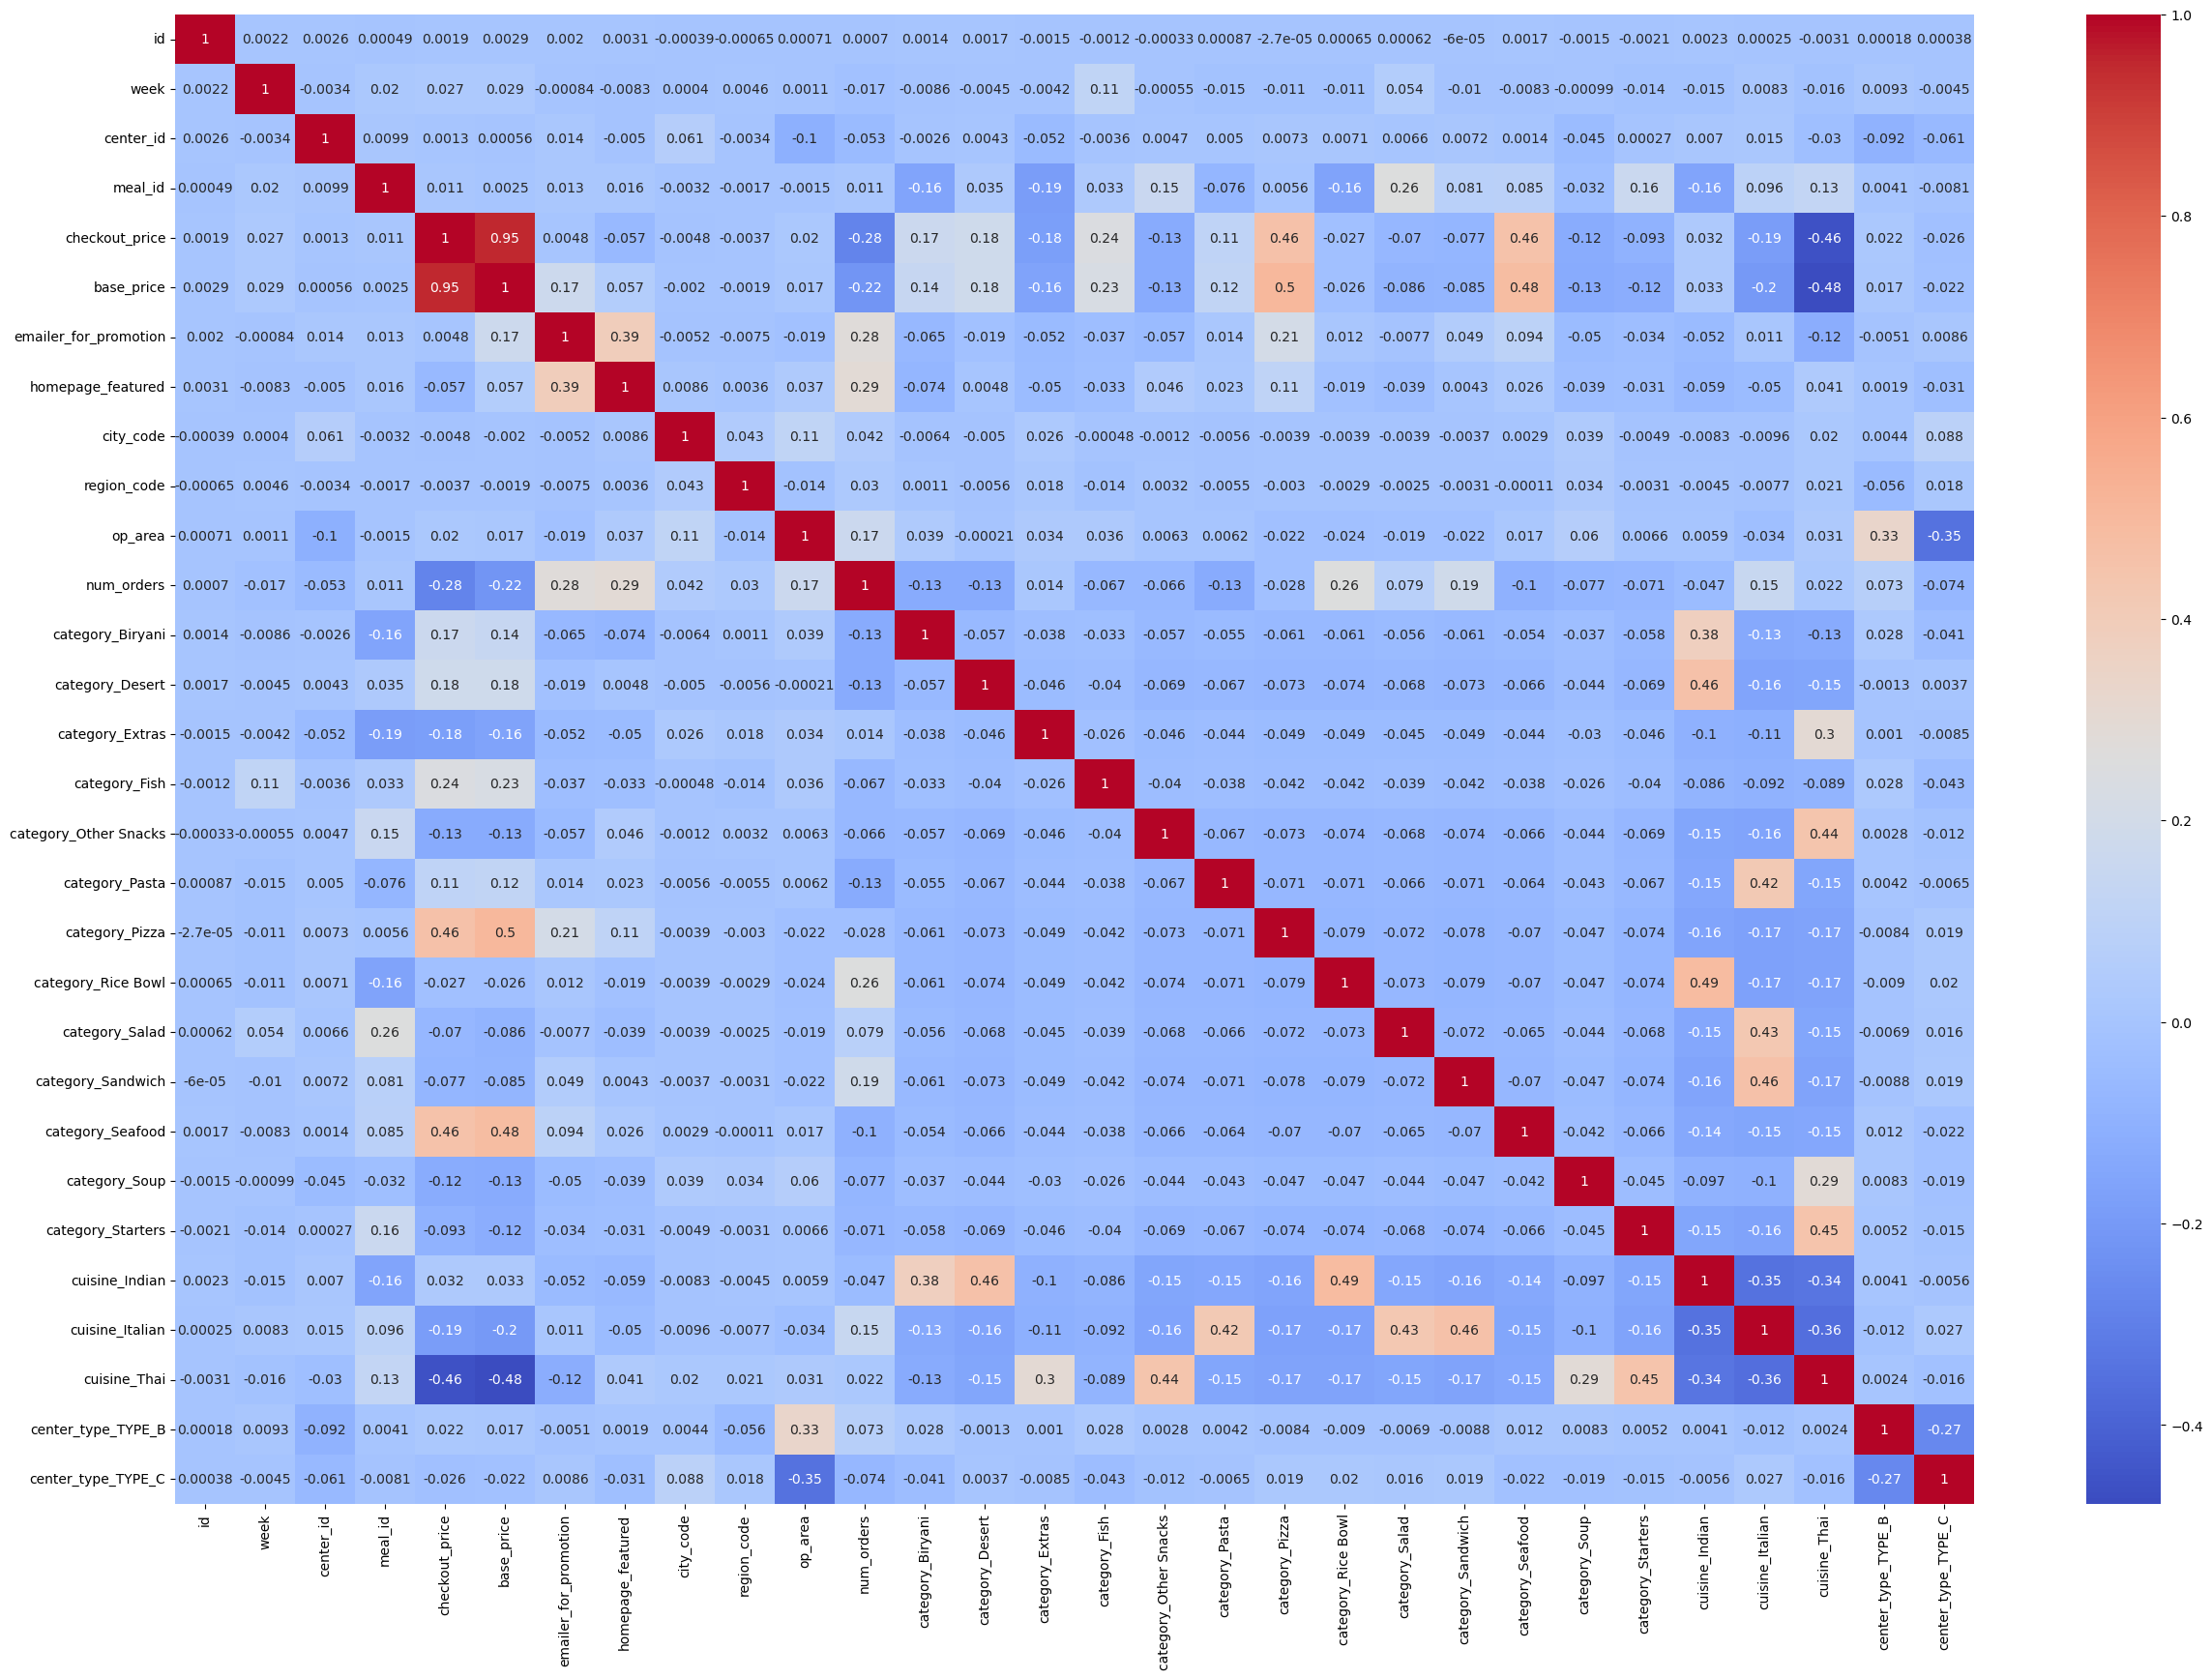

In [32]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Add a constant column for intercept
X = add_constant(train_df)  # 'train_df' is your DataFrame containing features

# Create an empty DataFrame to hold VIF values
vif = pd.DataFrame()

# Calculate VIF for each feature
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

# Display the result
print(vif)


    VIF Factor                Feature
0   260.231912                  const
1     1.000054                     id
2     1.018768                   week
3     1.047644              center_id
4     1.365768                meal_id
5    17.175265         checkout_price
6    25.321624             base_price
7     1.659570  emailer_for_promotion
8     1.350976      homepage_featured
9     1.046345              city_code
10    1.010301            region_code
11    1.324198                op_area
12    1.689111             num_orders
13    2.949763       category_Biryani
14    3.691368        category_Desert
15    1.564388        category_Extras
16    1.881931          category_Fish
17    2.457906  category_Other Snacks
18    3.330452         category_Pasta
19    4.421800         category_Pizza
20    2.786763     category_Rice Bowl
21    2.229731         category_Salad
22    2.344270      category_Sandwich
23    4.153089       category_Seafood
24    1.561438          category_Soup
25    2.6103

In [34]:
#remove a column base price or checkout price due to multicollinearity
train_df.drop(columns=['base_price','cuisine_Thai','id'],inplace=True)

In [35]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   week                   456548 non-null  int64
 1   center_id              456548 non-null  int64
 2   meal_id                456548 non-null  int64
 3   checkout_price         456548 non-null  int64
 4   emailer_for_promotion  456548 non-null  int64
 5   homepage_featured      456548 non-null  int64
 6   city_code              456548 non-null  int64
 7   region_code            456548 non-null  int64
 8   op_area                456548 non-null  int64
 9   num_orders             456548 non-null  int64
 10  category_Biryani       456548 non-null  int64
 11  category_Desert        456548 non-null  int64
 12  category_Extras        456548 non-null  int64
 13  category_Fish          456548 non-null  int64
 14  category_Other Snacks  456548 non-null  int64
 15  category_Pasta   

In [36]:


# Add a constant column for intercept
X = add_constant(train_df)  # 'train_df' is your DataFrame containing features

# Create an empty DataFrame to hold VIF values
vif = pd.DataFrame()

# Calculate VIF for each feature
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

# Display the result
print(vif)

    VIF Factor                Feature
0   138.359354                  const
1     1.017506                   week
2     1.047000              center_id
3     1.323538                meal_id
4     5.377935         checkout_price
5     1.385663  emailer_for_promotion
6     1.308837      homepage_featured
7     1.045969              city_code
8     1.009512            region_code
9     1.323722                op_area
10    1.668192             num_orders
11    2.248449       category_Biryani
12    2.716555        category_Desert
13    1.254014        category_Extras
14    1.709468          category_Fish
15    1.455066  category_Other Snacks
16    2.361339         category_Pasta
17    3.485031         category_Pizza
18    2.555162     category_Rice Bowl
19    2.073860         category_Salad
20    2.131472      category_Sandwich
21    3.215835       category_Seafood
22    1.206248          category_Soup
23    1.482992      category_Starters
24    4.521619         cuisine_Indian
25    4.2780

<Axes: >

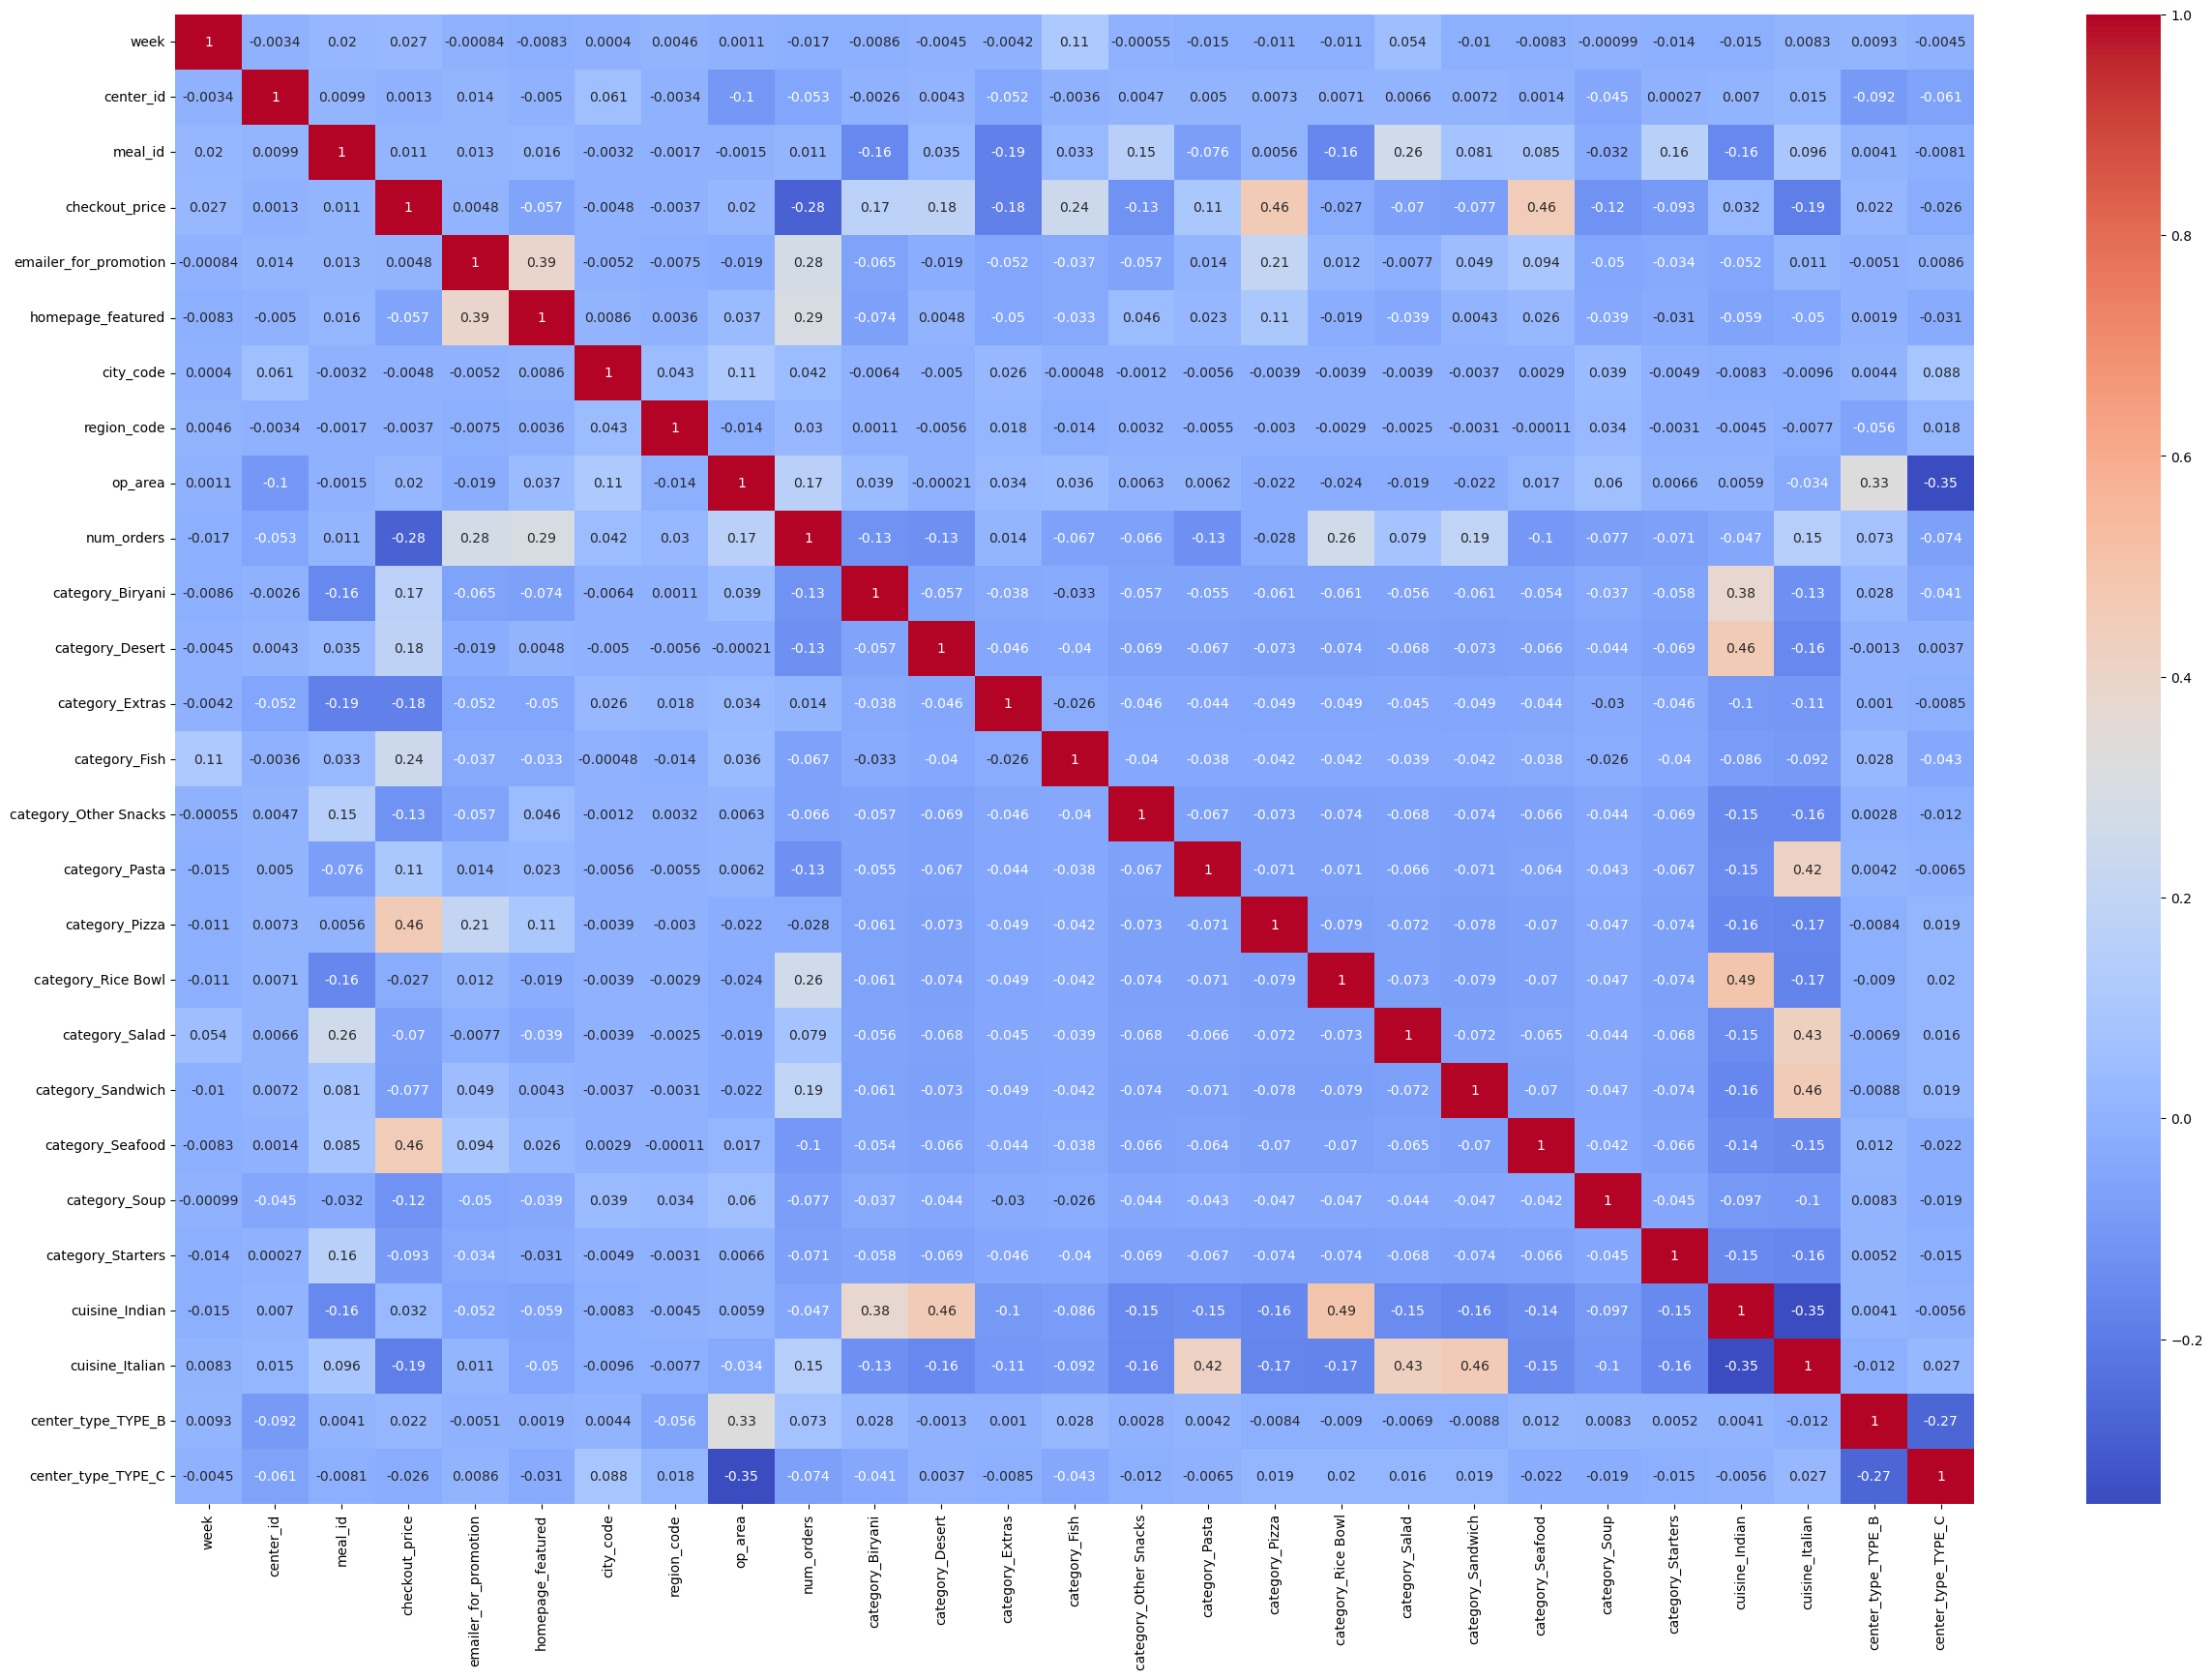

In [37]:

plt.figure(figsize=(30, 20))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   week                   456548 non-null  int64
 1   center_id              456548 non-null  int64
 2   meal_id                456548 non-null  int64
 3   checkout_price         456548 non-null  int64
 4   emailer_for_promotion  456548 non-null  int64
 5   homepage_featured      456548 non-null  int64
 6   city_code              456548 non-null  int64
 7   region_code            456548 non-null  int64
 8   op_area                456548 non-null  int64
 9   num_orders             456548 non-null  int64
 10  category_Biryani       456548 non-null  int64
 11  category_Desert        456548 non-null  int64
 12  category_Extras        456548 non-null  int64
 13  category_Fish          456548 non-null  int64
 14  category_Other Snacks  456548 non-null  int64
 15  category_Pasta   

In [39]:
targetColumn='num_orders'
columns=train_df.columns.tolist()
columns.remove(targetColumn)
columns.append(targetColumn)
train_df=train_df[columns]

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   week                   456548 non-null  int64
 1   center_id              456548 non-null  int64
 2   meal_id                456548 non-null  int64
 3   checkout_price         456548 non-null  int64
 4   emailer_for_promotion  456548 non-null  int64
 5   homepage_featured      456548 non-null  int64
 6   city_code              456548 non-null  int64
 7   region_code            456548 non-null  int64
 8   op_area                456548 non-null  int64
 9   category_Biryani       456548 non-null  int64
 10  category_Desert        456548 non-null  int64
 11  category_Extras        456548 non-null  int64
 12  category_Fish          456548 non-null  int64
 13  category_Other Snacks  456548 non-null  int64
 14  category_Pasta         456548 non-null  int64
 15  category_Pizza   

<Axes: title={'center': 'Number of Orders by Week'}, xlabel='Week Number', ylabel='Number of Orders'>

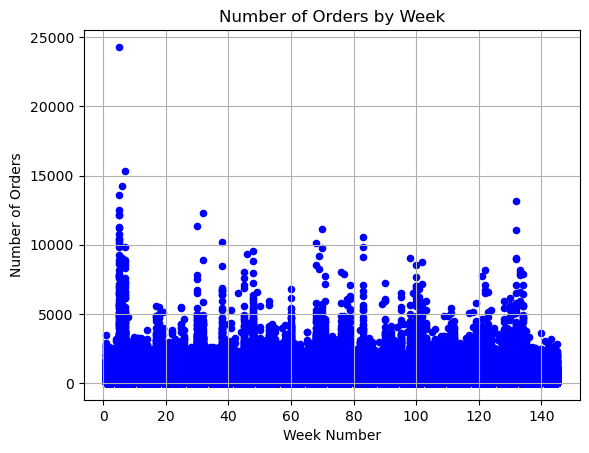

In [41]:
train_df.plot(kind = "scatter", x = "week", y = "num_orders",
           title = "Number of Orders by Week", xlabel = "Week Number",
           ylabel = "Number of Orders", color = "blue", grid = True)


In [42]:
# Make a copy of the DataFrame slice
rows_to_remove = train_df[train_df['num_orders'] > 15000].copy()
train_df.drop(rows_to_remove.index, inplace=True)


/var/folders/k2/nvf86d810mv012brfx5p95pm0000gn/T/ipykernel_63404/1933132451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(rows_to_remove.index, inplace=True)


<Axes: title={'center': 'Number of Orders by Week'}, xlabel='Week Number', ylabel='Number of Orders'>

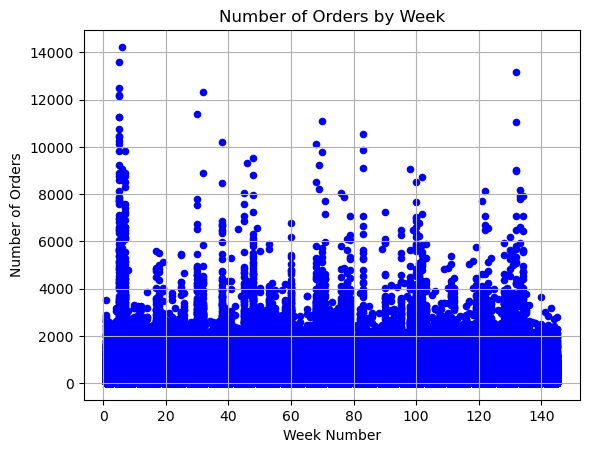

In [43]:
train_df.plot(kind = "scatter", x = "week", y = "num_orders",
           title = "Number of Orders by Week", xlabel = "Week Number",
           ylabel = "Number of Orders", color = "blue", grid = True)


<Axes: >

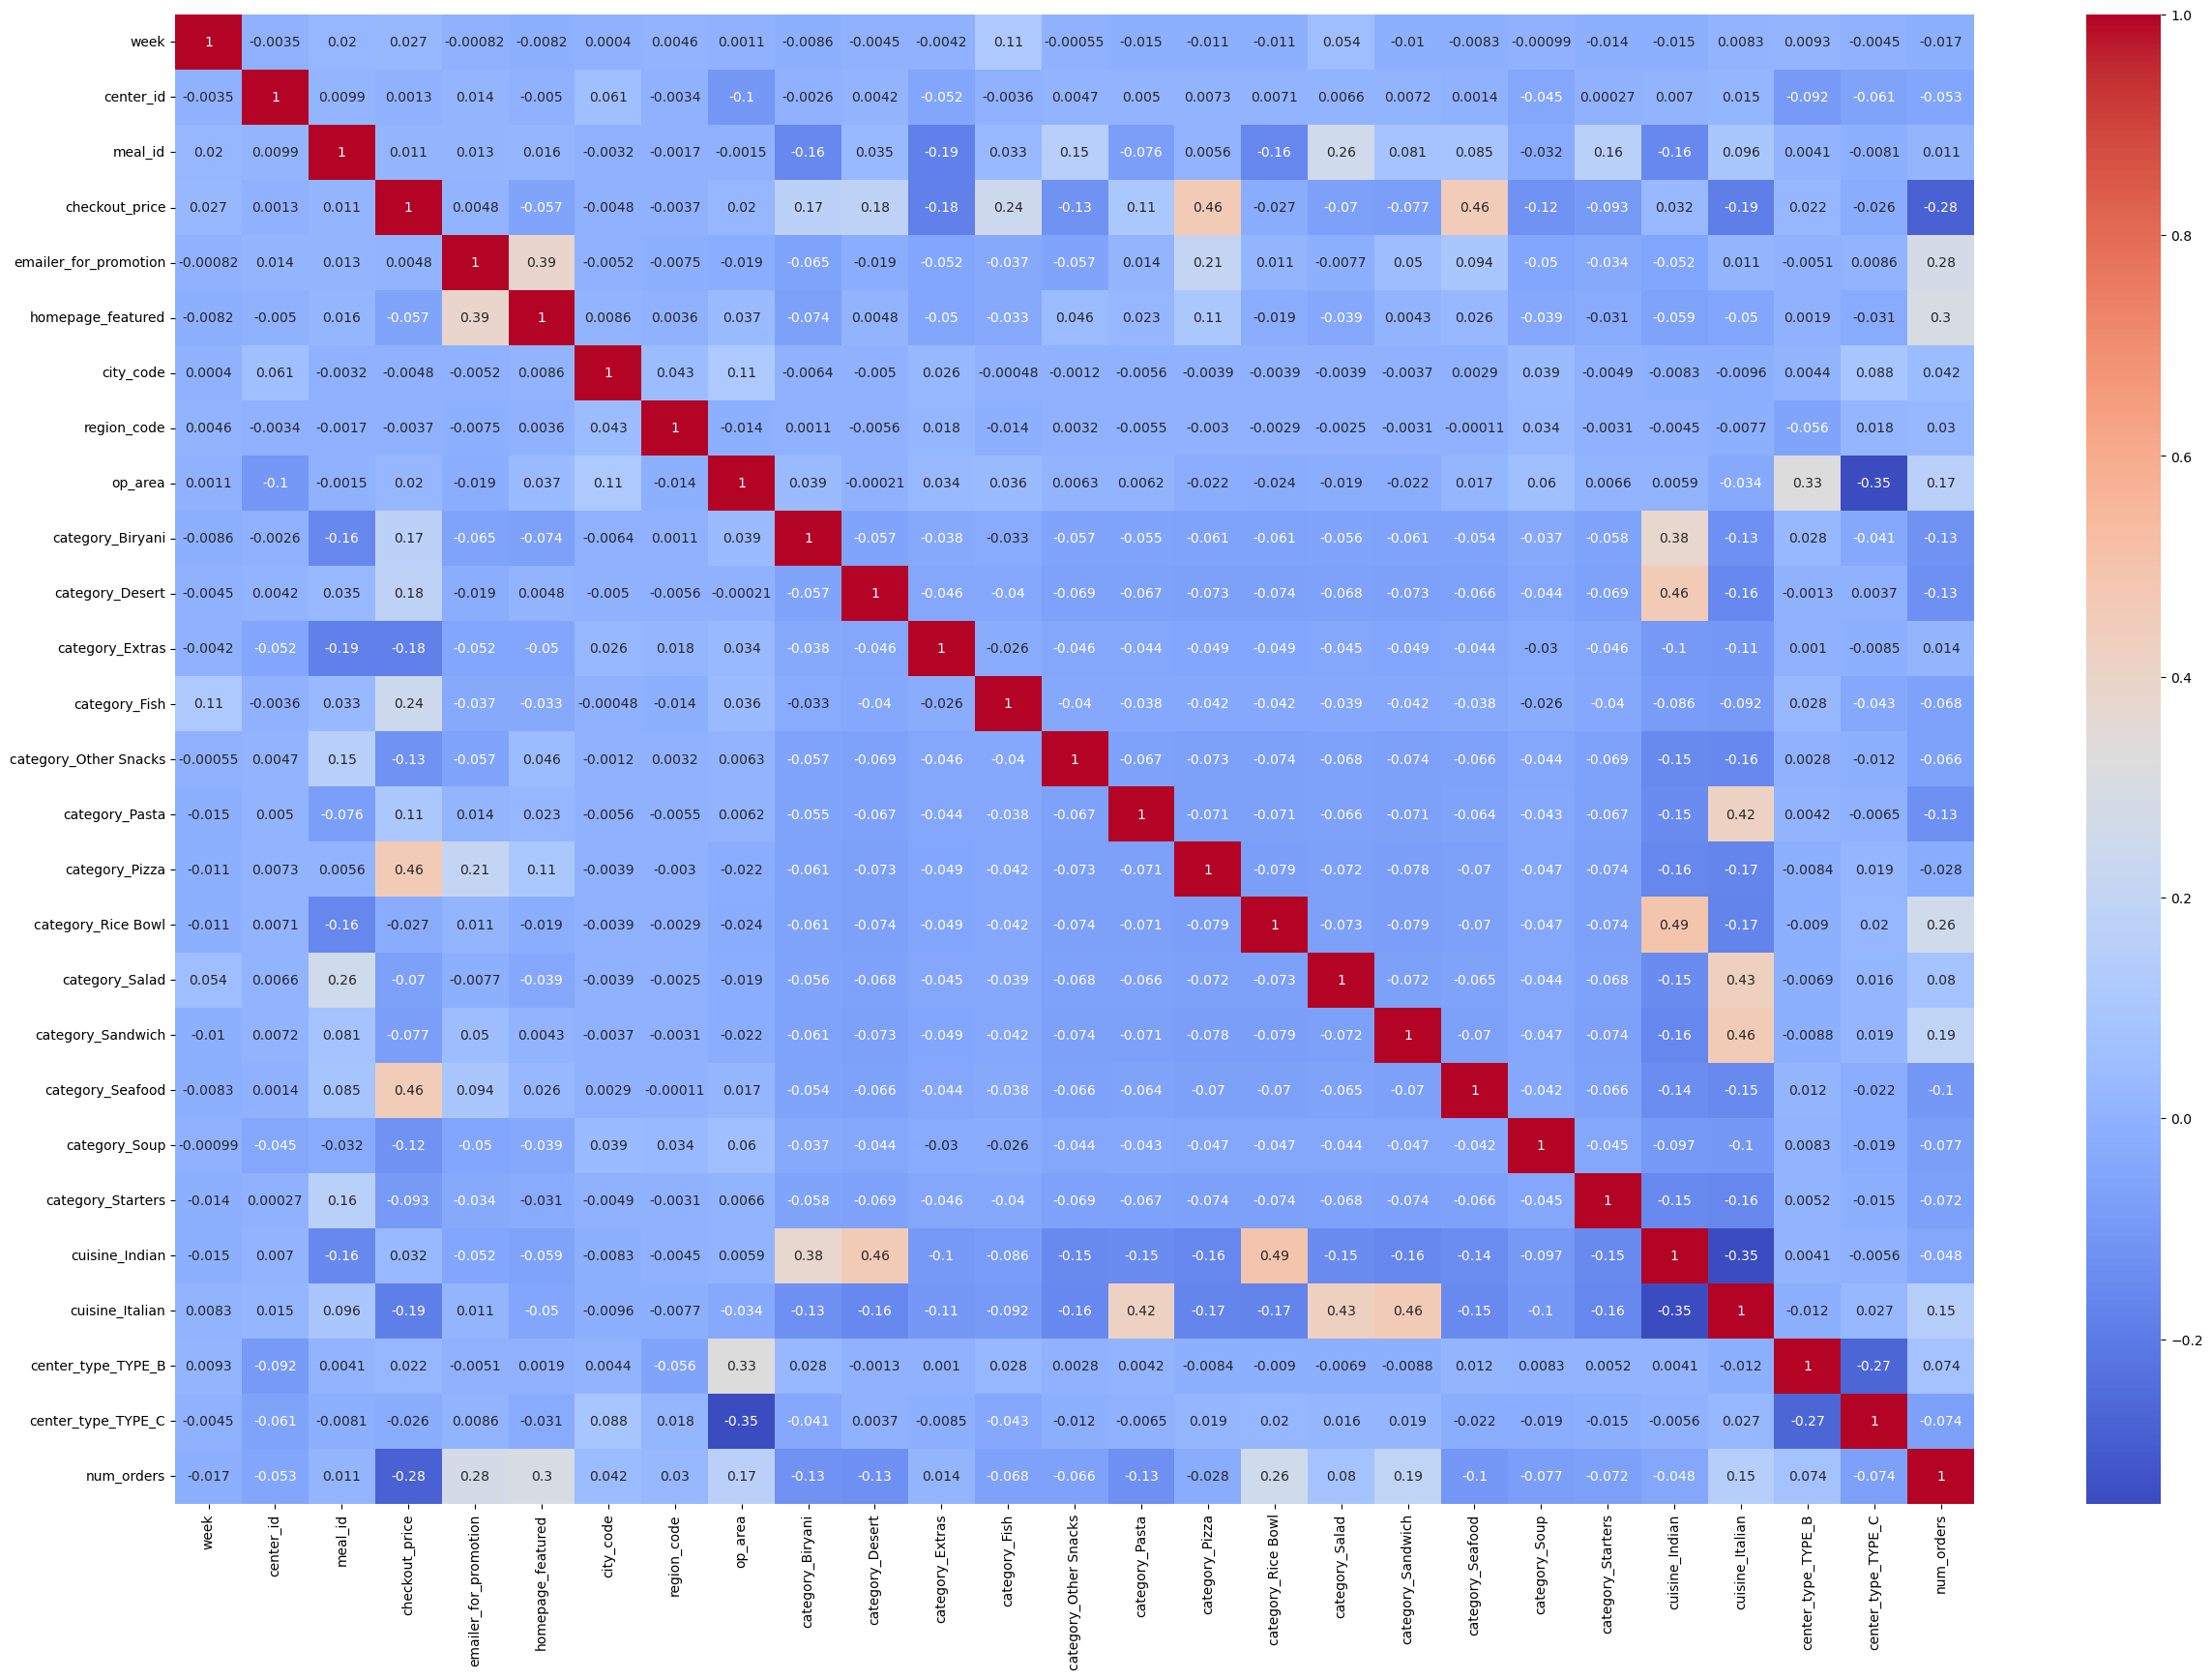

In [44]:
plt.figure(figsize=(30, 20))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456546 entries, 0 to 456547
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   week                   456546 non-null  int64
 1   center_id              456546 non-null  int64
 2   meal_id                456546 non-null  int64
 3   checkout_price         456546 non-null  int64
 4   emailer_for_promotion  456546 non-null  int64
 5   homepage_featured      456546 non-null  int64
 6   city_code              456546 non-null  int64
 7   region_code            456546 non-null  int64
 8   op_area                456546 non-null  int64
 9   category_Biryani       456546 non-null  int64
 10  category_Desert        456546 non-null  int64
 11  category_Extras        456546 non-null  int64
 12  category_Fish          456546 non-null  int64
 13  category_Other Snacks  456546 non-null  int64
 14  category_Pasta         456546 non-null  int64
 15  category_Pizza        

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
     

In [47]:
X = train_df.drop('num_orders', axis=1)  # Features
y = train_df['num_orders']  # Target variable
     
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [48]:
print("\nShape of the Features (X):", X.shape)
print("Shape of the Target (y):", y.shape)


Shape of the Features (X): (456546, 26)
Shape of the Target (y): (456546,)


In [49]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
     

# 3. Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [50]:
def evaluate_model(model_name, true_values, predicted_values):
    rmse = sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    print(f"{model_name} - RMSE: {rmse}, R2 Score: {r2}")
     

# Evaluating the models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree Regressor", y_test, dt_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)
     

Linear Regression - RMSE: 300.09986862452877, R2 Score: 0.40447415417737886
Decision Tree Regressor - RMSE: 190.05502531955568, R2 Score: 0.7611486397668881
Random Forest Regressor - RMSE: 141.74198027685247, R2 Score: 0.8671486426460882


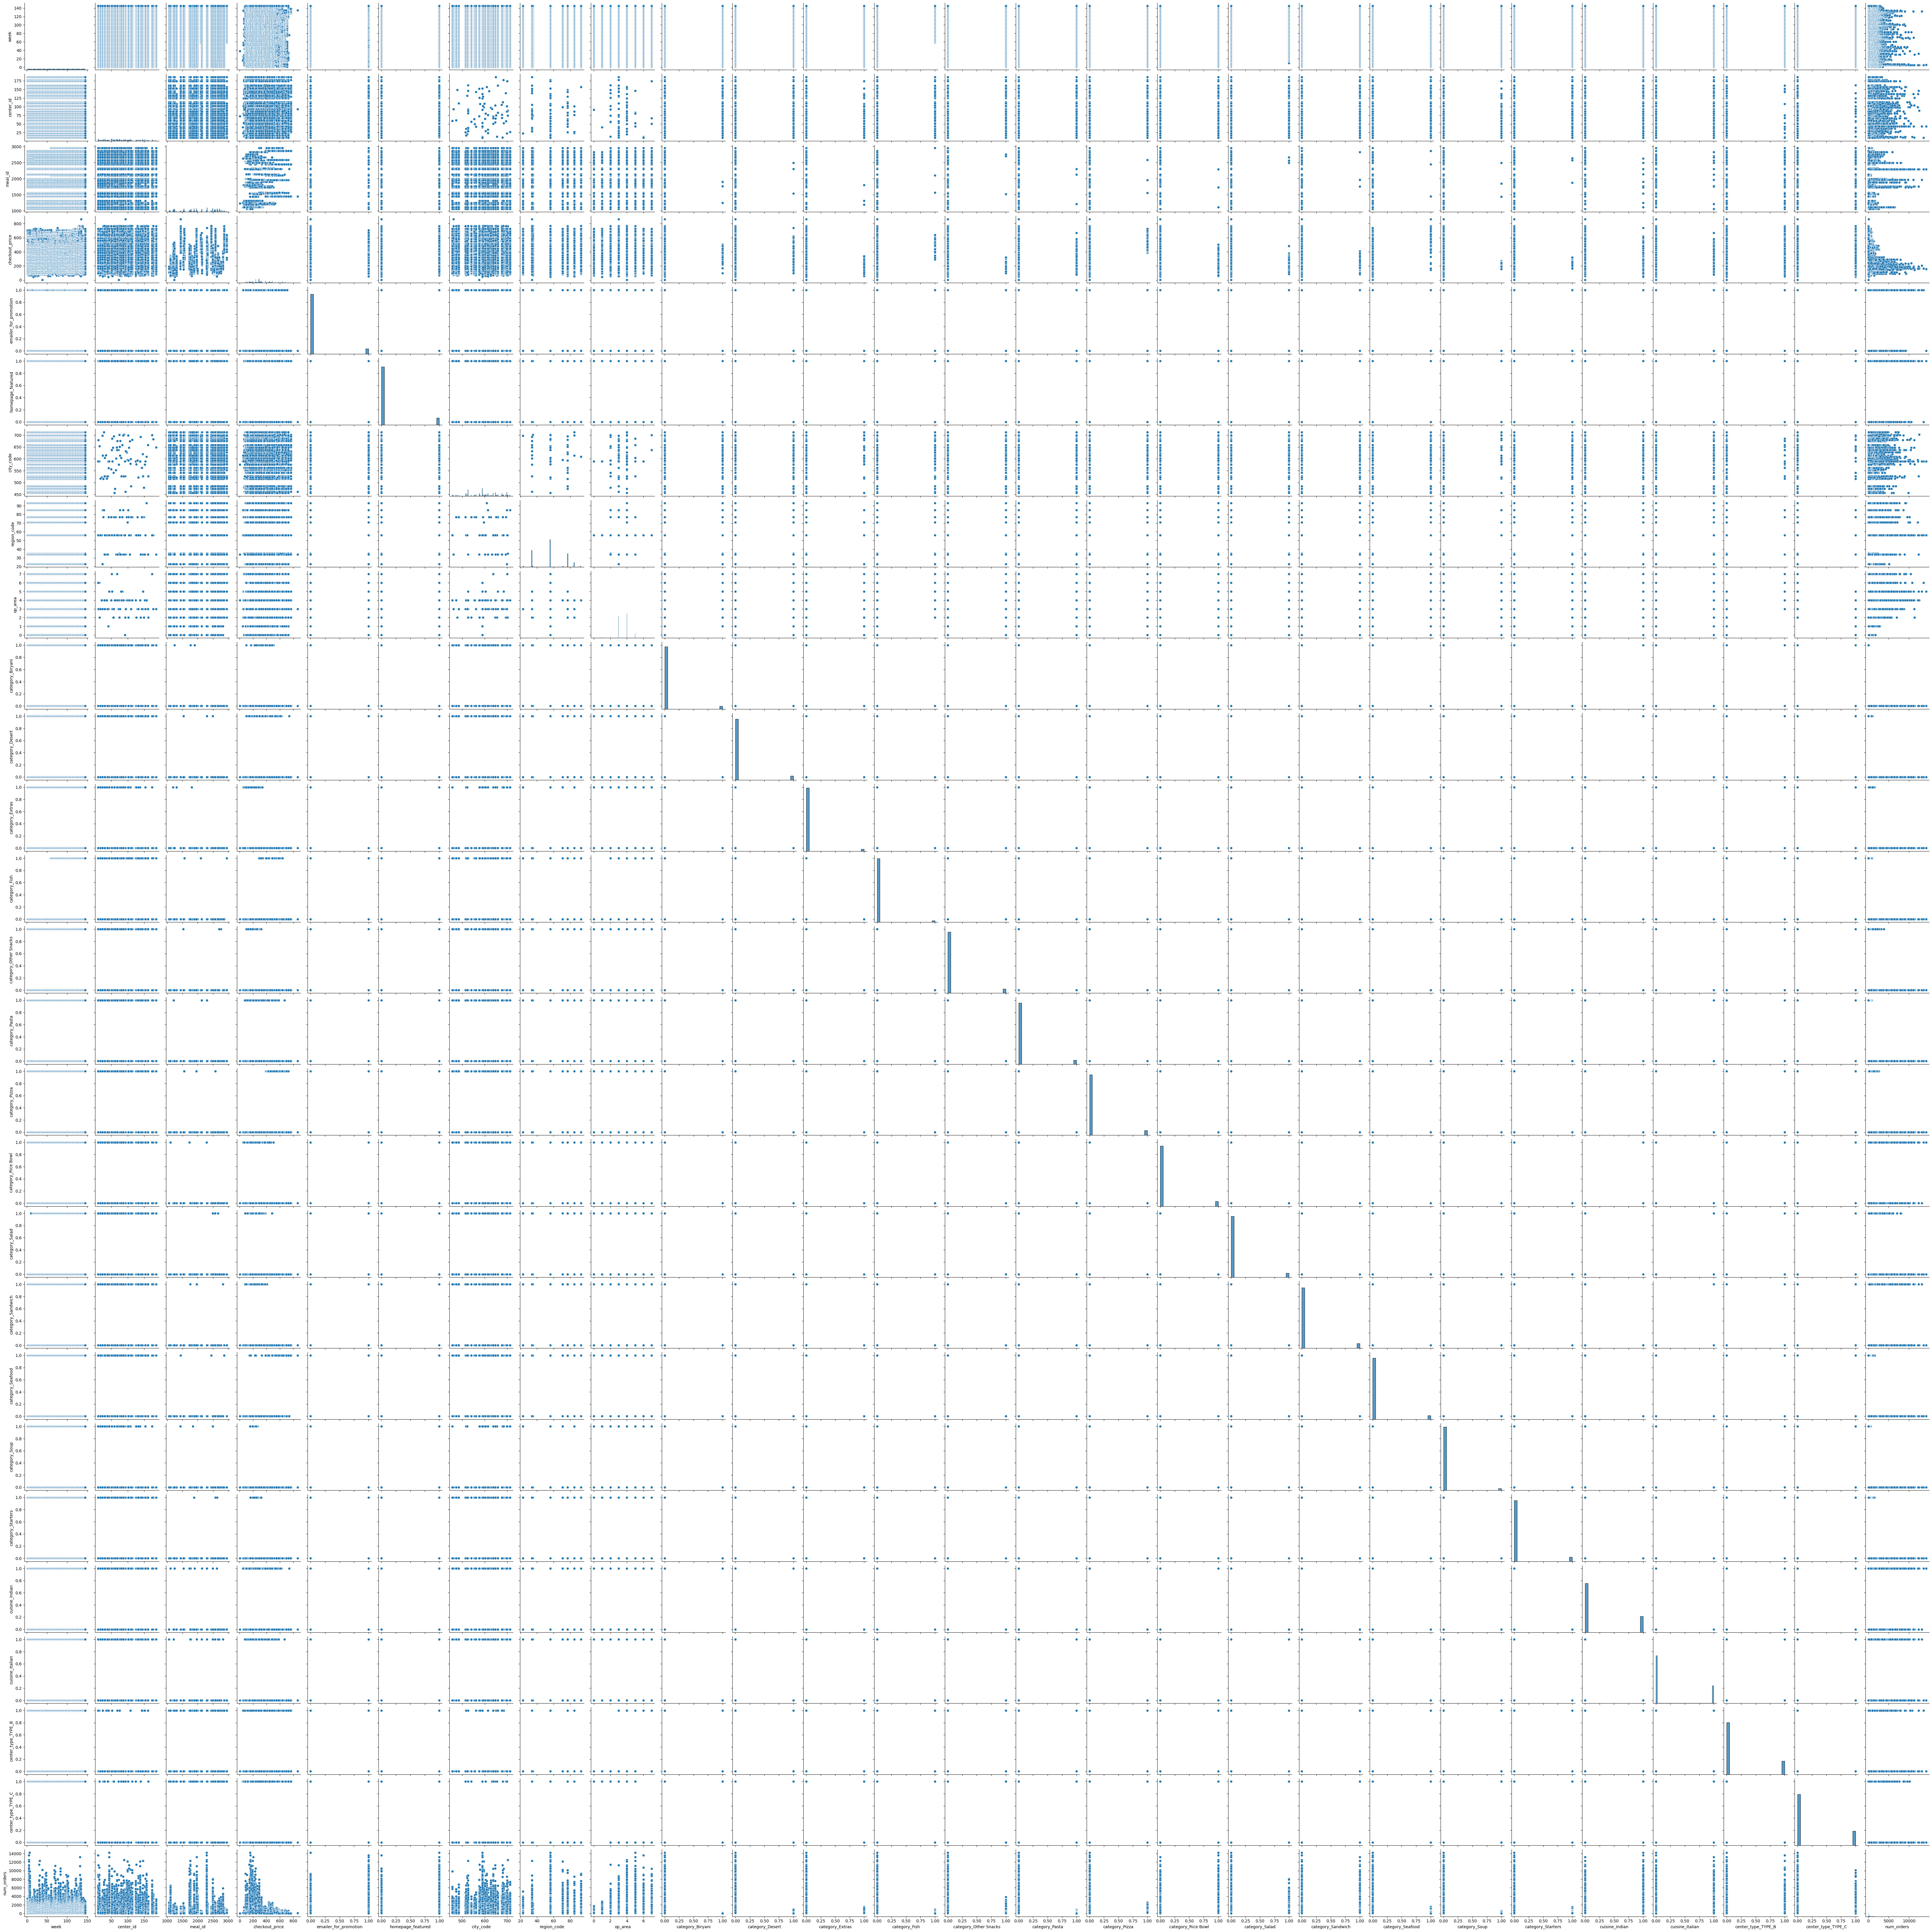

In [103]:
sns.pairplot(train_df)

In [105]:
test_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured   category cuisine  city_code  \
0                      0                  0  Beverages    Thai        647   
1                      0                  0  Beverages    Thai        647   
2                      0                  0  Beverages    Thai        647   
3                      0                  0  Beverages  Indian        647   
4                      0                  0  Beverages  Indian        647   

   region_code center_type  op_area  
0           56      TYPE_C      2.0  
1           56      TYPE_C      2.0  
2           56      TYPE_C      2.0  
3           56      TYPE_C      2.0  
4           56      TYPE_C      2.0

In [107]:
test_df['category'] = test_df['category'].astype('category')
test_df['cuisine'] = test_df['cuisine'].astype('category')
test_df['center_type'] = test_df['center_type'].astype('category')


In [109]:
test_df = pd.get_dummies(test_df, drop_first=True, columns=['category', 'cuisine', 'center_type'], 
                         prefix=['category', 'cuisine', 'center_type'])


In [111]:
test_df = test_df.astype(int)


In [113]:
test_df.drop(columns=['base_price', 'cuisine_Thai', 'id'], inplace=True)


In [115]:
test_df.head()

week  center_id  meal_id  checkout_price  emailer_for_promotion  \
0   146         55     1885             158                      0   
1   146         55     1993             160                      0   
2   146         55     2539             157                      0   
3   146         55     2631             162                      0   
4   146         55     1248             163                      0   

   homepage_featured  city_code  region_code  op_area  category_Biryani  ...  \
0                  0        647           56        2                 0  ...   
1                  0        647           56        2                 0  ...   
2                  0        647           56        2                 0  ...   
3                  0        647           56        2                 0  ...   
4                  0        647           56        2                 0  ...   

   category_Rice Bowl  category_Salad  category_Sandwich  category_Seafood  \
0                   0               0                  0                 0   
1                   0               0                  0                 0   
2                   0               0                  0                 0   
3                   0               0                  0                 0   
4                   0               0                  0                 0   

   category_Soup  category_Starters  cuisine_Indian  cuisine_Italian  \
0              0                  0               0                0   
1              0                  0               0                0   
2              0                  0               0                0   
3              0                  0               1                0   
4              0                  0               1                0   

   center_type_TYPE_B  center_type_TYPE_C  
0                   0                   1  
1                   0                   1  
2                   0                   1  
3                   0                   1  
4                   0                   1  

[5 rows x 26 columns]

In [121]:
# Check if train and test have the same columns
missing_cols = set(X_train.columns) - set(test_df.columns)
extra_cols = set(test_df.columns) - set(X_train.columns)

print("Missing columns in test_df:", missing_cols)
print("Extra columns in test_df:", extra_cols)



Missing columns in test_df: set()
Extra columns in test_df: set()


In [123]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [125]:
# Load the trained model
rf_model = joblib.load('random_forest_model.pkl')


In [127]:
# Make predictions using the trained Random Forest model
test_df['predicted_demand'] = rf_model.predict(test_df)


In [129]:
# Save predictions to CSV
test_df.to_csv('demand_forecast_results.csv', index=False)

# Display the first few rows
print(test_df[['predicted_demand']].head())


   predicted_demand
0            128.40
1             73.10
2            140.95
3             74.20
4             61.92
